In [21]:
from src.processing import df, X, y
from src.functions import test_classifiers
from src.functions import plot_pca_components
from src.functions import plot_learningcurve
from src.functions import show_classifier_metrics
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hmean

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.inspection import permutation_importance

In [5]:
sns.set_theme(style="dark", palette="Dark2")

In [6]:
X = X.drop([
    "Disability_SocialEmotional",
    "Kinder_Age",
    "NumSibling",
    "SiblingOrder",
    "Year_02"
], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

In [10]:
test_classifiers(
    X=X_train,
    y=y_train,
    print_res=True,
    scoring=f1_score,
    resampler=SMOTE(random_state=42),
)

Classifiers:  LogisticRegression Has a training score of 0.56
Classifiers:  KNeighborsClassifier Has a training score of 0.56
Classifiers:  SVC Has a training score of 0.56
Classifiers:  RandomForestClassifier Has a training score of 0.59
Classifiers:  XGBClassifier Has a training score of 0.55
Classifiers:  GaussianNB Has a training score of 0.54


In [12]:
test_classifiers(
    X=X_train,
    y=y_train,
    print_res=True,
    scoring=f1_score,
    resampler=RandomUnderSampler(random_state=42),
)

Classifiers:  LogisticRegression Has a training score of 0.59
Classifiers:  KNeighborsClassifier Has a training score of 0.54
Classifiers:  SVC Has a training score of 0.6
Classifiers:  RandomForestClassifier Has a training score of 0.61
Classifiers:  XGBClassifier Has a training score of 0.58
Classifiers:  GaussianNB Has a training score of 0.57


In [13]:
comps = [16, 12, 8, 4, 2]

In [14]:
common = {
    "X": X_train,
    "y": y_train,
    "n_comp_list": comps,
    "resampler": RandomUnderSampler(random_state=42)
}

NEXT TWO CELLS TAKE A WHILE TO RUN

In [16]:
d = plot_pca_components(
    scoring= accuracy_score,
    **common
)

In [15]:
d_f1 = plot_pca_components(
    scoring= f1_score,
    **common
)

-----------------------------------------------

In [17]:
print(d)
print(d_f1)

{'LogisticRegression': [np.float64(0.74), np.float64(0.74), np.float64(0.75), np.float64(0.75), np.float64(0.75)], 'KNeighborsClassifier': [np.float64(0.7), np.float64(0.71), np.float64(0.7), np.float64(0.71), np.float64(0.71)], 'SVC': [np.float64(0.74), np.float64(0.74), np.float64(0.74), np.float64(0.75), np.float64(0.75)], 'RandomForestClassifier': [np.float64(0.74), np.float64(0.74), np.float64(0.74), np.float64(0.74), np.float64(0.7)], 'XGBClassifier': [np.float64(0.73), np.float64(0.71), np.float64(0.69), np.float64(0.71), np.float64(0.69)], 'GaussianNB': [np.float64(0.73), np.float64(0.74), np.float64(0.74), np.float64(0.74), np.float64(0.75)]}
{'LogisticRegression': [np.float64(0.61), np.float64(0.61), np.float64(0.62), np.float64(0.61), np.float64(0.61)], 'KNeighborsClassifier': [np.float64(0.56), np.float64(0.55), np.float64(0.55), np.float64(0.56), np.float64(0.56)], 'SVC': [np.float64(0.6), np.float64(0.6), np.float64(0.6), np.float64(0.61), np.float64(0.62)], 'RandomForest

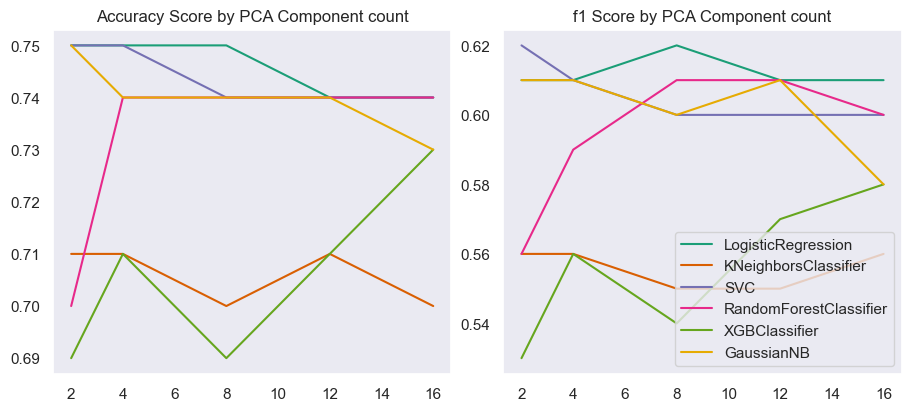

In [ ]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(9, 4))
for key in d:
    ax[0].plot(comps, d[key], label=key)
ax[0].set_title("Accuracy Score by PCA Component count")
for key in d_f1:
    ax[1].plot(comps, d_f1[key], label=key)
ax[1].set_title("f1 Score by PCA Component count")
ax[1].legend(loc="lower right")

plt.show()

In [28]:
logreg_pipe_0 = Pipeline(
        [
            ("resample", RandomUnderSampler(random_state=42)),
            ("scaling", StandardScaler()),
            ("pca", PCA(n_components=8, random_state=42)),
            ("classifier", LogisticRegression(random_state=42))
        ]
    )

svc_pipe_0 = Pipeline(
        [
            ("resample", RandomUnderSampler(random_state=42)),
            ("scaling", StandardScaler()),
            ("pca", PCA(n_components=4, random_state=42)),
            ("classifier", SVC(random_state=42))
        ]
    )

In [21]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
logreg_param_grid = {
    "classifier__solver": ["liblinear", "lbfgs", "newton-cg"],
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    
}


search = GridSearchCV(
    estimator=logreg_pipe_0, 
    param_grid=logreg_param_grid, 
    cv=cv, 
    scoring="f1"
)


In [39]:
svc_param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__kernel": ["linear", "rbf"],
    "classifier__gamma": [0.001, 0.01, 0.1, 1]
}

svc_search = GridSearchCV(
    estimator=svc_pipe_0, 
    param_grid=svc_param_grid, 
    cv=cv, 
    scoring="f1"
)

THE NEXT TWO CELLS TAKE 10 YEARS TO RUN


In [34]:
search.fit(X_train, y_train)
print(search.best_params_)

{'classifier__C': 0.1, 'classifier__solver': 'newton-cg'}


In [40]:
svc_search.fit(X_train, y_train)
print(svc_search.best_params_)

{'classifier__C': 0.01, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}


----------------

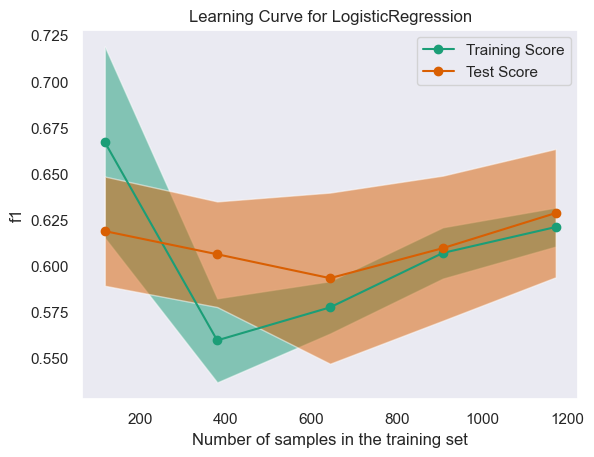

In [41]:
model = LogisticRegression(C=0.1, solver='newton-cg', random_state=42)
plot_learningcurve(model, X_train, y_train, pca_comp=8)

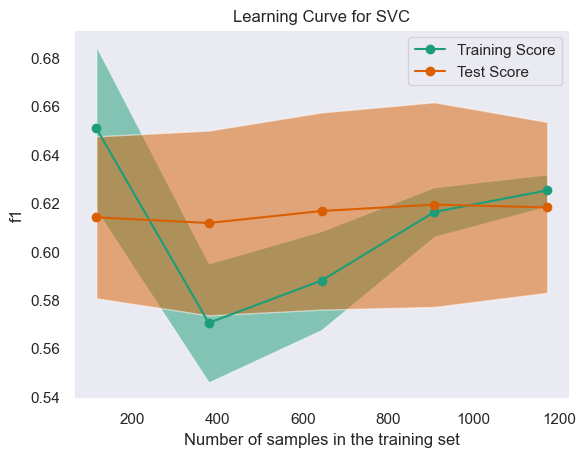

In [42]:
model_svc = SVC(C=0.1, gamma=0.001, kernel='rbf')
plot_learningcurve(model_svc, X_train, y_train, pca_comp=4)

In [48]:
logreg_pipe_1 = Pipeline(
        [
            ("resample", RandomUnderSampler(random_state=42)),
            ("scaling", StandardScaler()),
            ("pca", PCA(n_components=8, random_state=42)),
            ("classifier", LogisticRegression(C=0.1, solver='newton-cg', random_state=42))
        ]
    )
svc_pipe_1 = Pipeline(
        [
            ("resample", RandomUnderSampler(random_state=42)),
            ("scaling", StandardScaler()),
            ("pca", PCA(n_components=4, random_state=42)),
            ("classifier", SVC(C=0.1, gamma=0.001, kernel='rbf', probability=True))
        ]
    )



In [49]:
y_scores_logreg = cross_val_predict(
    estimator=logreg_pipe_1,
    X=X_train,
    y=y_train, 
    cv=cv, 
    method="predict_proba"
)[:, 1]

y_scores_svc = cross_val_predict(
    estimator=svc_pipe_1, 
    X=X_train, 
    y=y_train, 
    cv=cv, 
    method="predict_proba"
)[:, 1]


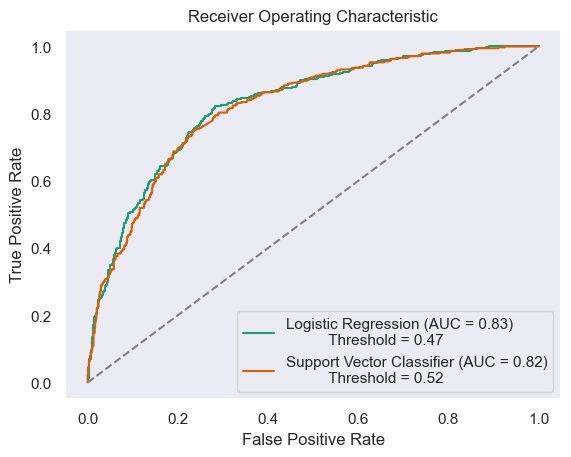

In [50]:

fpr, tpr, thresholds = roc_curve(y_train, y_scores_logreg)
roc_auc = auc(fpr, tpr)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_train, y_scores_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_idx_svc = np.argmax(tpr_svc-fpr_svc)
optimal_threshold_svc = thresholds_svc[optimal_idx_svc]

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})\n \
         Threshold = {optimal_threshold:.2f}')
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Classifier (AUC = {roc_auc_svc:.2f})\n \
         Threshold = {optimal_threshold_svc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

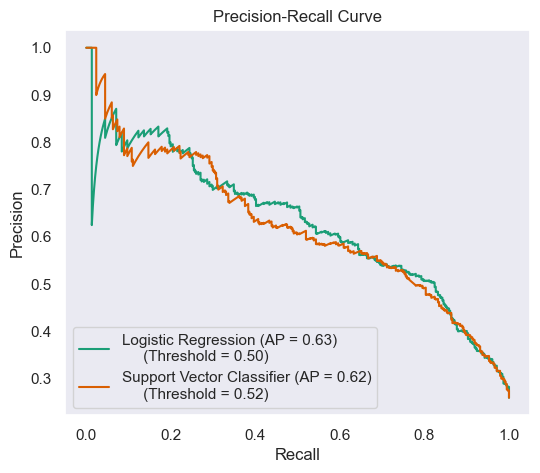

In [51]:
precision, recall, pr_thresholds = \
    precision_recall_curve(y_train, y_scores_logreg)
avg_precision = average_precision_score(y_train, y_scores_logreg)

precision_svc, recall_svc, pr_thresholds_svc = \
    precision_recall_curve(y_train, y_scores_svc)
avg_precision_svc = average_precision_score(y_train, y_scores_svc)

pr_optimal_idx = np.argmax(hmean([precision, recall]))
pr_optimal_threshold = pr_thresholds[pr_optimal_idx]

pr_optimal_idx_svc = np.argmax(hmean([precision_svc, recall_svc]))
pr_optimal_threshold_svc = pr_thresholds_svc[pr_optimal_idx_svc]


plt.figure(figsize=(6, 5))
plt.plot(
    recall, 
    precision, 
    label=f'Logistic Regression (AP = {avg_precision:.2f})\n \
    (Threshold = {pr_optimal_threshold:.2f})')
plt.plot(
    recall_svc, 
    precision_svc, 
    label=f'Support Vector Classifier (AP = {avg_precision_svc:.2f})\n \
    (Threshold = {pr_optimal_threshold_svc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Testing thresholds for Cross Validation predictions

accuracy_score:  0.742837653478854
recall_score:  0.8162729658792651
f1_score:  0.6226226226226226
classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.72      0.80      1085
           1       0.50      0.82      0.62       381

    accuracy                           0.74      1466
   macro avg       0.71      0.77      0.71      1466
weighted avg       0.81      0.74      0.76      1466



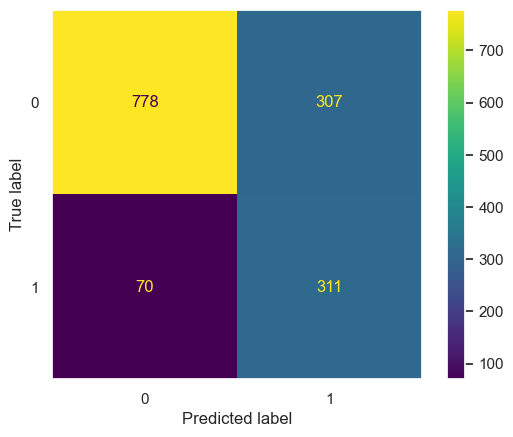

In [58]:
show_classifier_metrics(y_train, y_scores_logreg, prob_threshold=0.47)

accuracy_score:  0.73806275579809
recall_score:  0.7795275590551181
f1_score:  0.6073619631901841
classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1085
           1       0.50      0.78      0.61       381

    accuracy                           0.74      1466
   macro avg       0.70      0.75      0.71      1466
weighted avg       0.80      0.74      0.75      1466



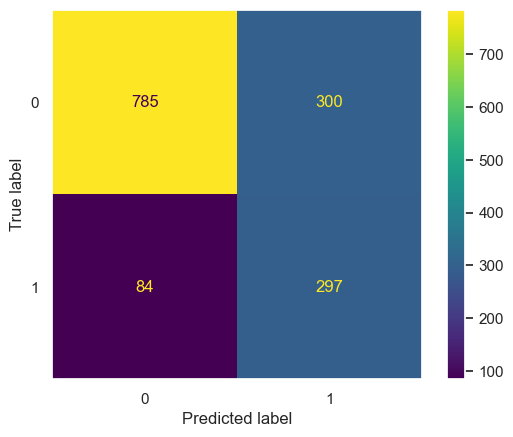

In [53]:
show_classifier_metrics(y_train, y_scores_svc, prob_threshold=0.5)

Final Tests

accuracy_score:  0.7302452316076294
recall_score:  0.7395833333333334
f1_score:  0.5892116182572614
classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       271
           1       0.49      0.74      0.59        96

    accuracy                           0.73       367
   macro avg       0.69      0.73      0.69       367
weighted avg       0.78      0.73      0.74       367



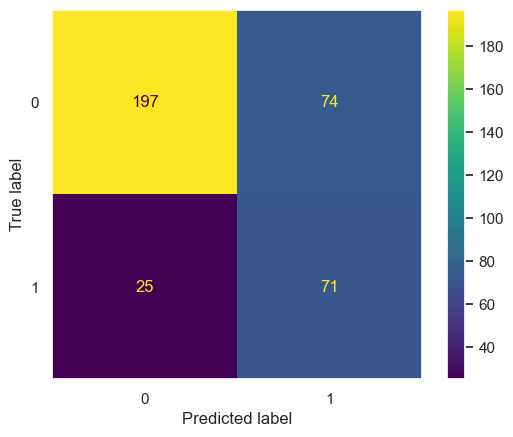

In [59]:
logreg_pipe_1.fit(X_train, y_train)
y_pred_logreg = logreg_pipe_1.predict_proba(X_test)[:, 1]
show_classifier_metrics(y_test, y_pred_logreg, prob_threshold=0.47)

accuracy_score:  0.7356948228882834
recall_score:  0.65625
f1_score:  0.5650224215246636
classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       271
           1       0.50      0.66      0.57        96

    accuracy                           0.74       367
   macro avg       0.68      0.71      0.69       367
weighted avg       0.77      0.74      0.75       367



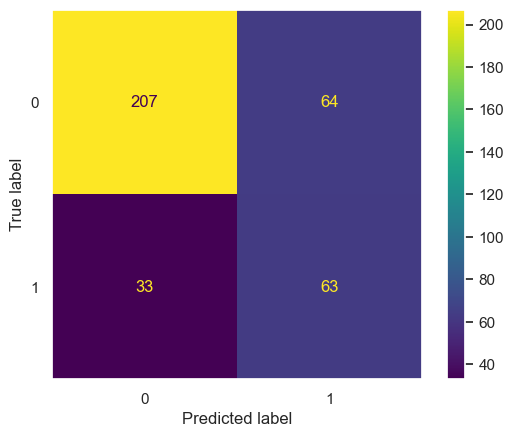

In [61]:
svc_pipe_1.fit(X_train, y_train)
y_pred_svc = svc_pipe_1.predict_proba(X_test)[:, 1]
show_classifier_metrics(y_test, y_pred_svc, prob_threshold=0.50)

accuracy_score:  0.7929155313351499
recall_score:  0.3541666666666667
f1_score:  0.4722222222222222
classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       271
           1       0.71      0.35      0.47        96

    accuracy                           0.79       367
   macro avg       0.76      0.65      0.67       367
weighted avg       0.78      0.79      0.77       367



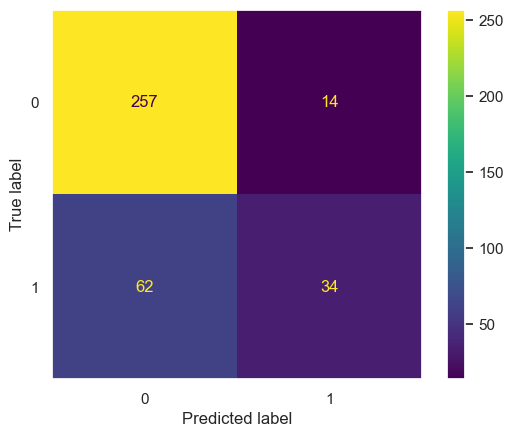

In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_unoptimised = model.predict(X_test)
show_classifier_metrics(y_test, y_pred_unoptimised)

Inspecting the better performing GNB model

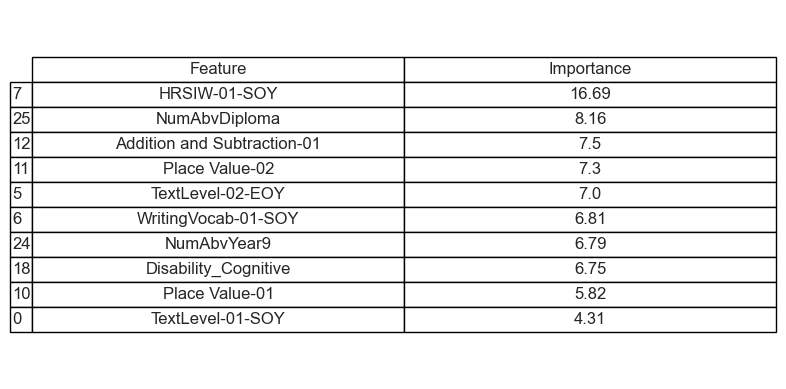

In [68]:
p_imp = permutation_importance(
    logreg_pipe_1, X_test, y_test, scoring='f1', n_repeats=10, random_state=42
)


importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': [round(abs(x*1000), 2) for x in p_imp.importances_mean]
}).sort_values(by='Importance', ascending=False)


fig, ax = plt.subplots()
ax.set_axis_off()
ax.table(importance_df.head(10), loc="center", cellLoc="center").scale(1.5, 1.5)
plt.show()

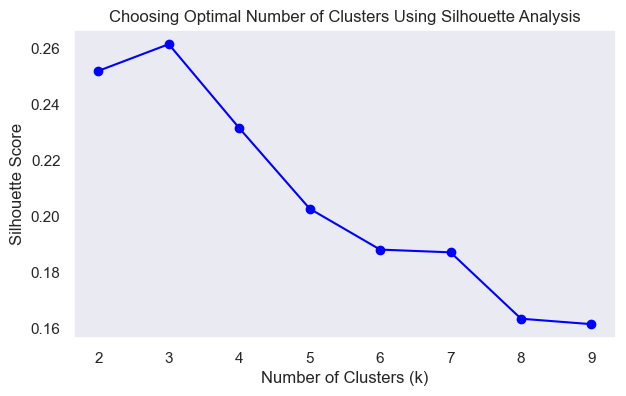

In [9]:
cluster_range = range(2, 10)  # Trying from 2 to 9 clusters
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(7, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Choosing Optimal Number of Clusters Using Silhouette Analysis")
plt.show()


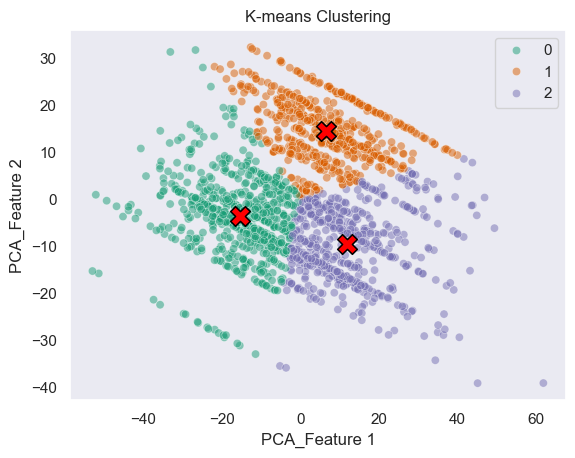

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X=X, y=y)

y_kmeans = kmeans.fit_predict(X_pca)


sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=y_kmeans, 
    alpha=0.5,
    palette="Dark2"
)

centers = kmeans.cluster_centers_

sns.scatterplot(
    x=centers[:, 0], 
    y=centers[:, 1], 
    c='red', 
    s=200, 
    marker='X', 
    edgecolors='black'
)
plt.title("K-means Clustering")
plt.xlabel("PCA_Feature 1")
plt.ylabel("PCA_Feature 2")
plt.show()


In [25]:
clusters = df.iloc[:, 1:-1]
clusters["at_risk"] = y
clusters["cluster_label"] = y_kmeans
print(clusters.describe())

       TextLevel-01-SOY  TextLevel-01-MOY  TextLevel-01-EOY  TextLevel-02-SOY  \
count       1833.000000       1833.000000       1833.000000       1833.000000   
mean          10.168031         14.487179         20.708674         21.299509   
std            5.530002          4.943234          4.225006          4.848725   
min            0.000000          0.000000          4.000000          2.000000   
25%            6.000000         11.000000         18.000000         18.000000   
50%           10.000000         14.000000         20.000000         21.000000   
75%           13.000000         17.000000         23.000000         25.000000   
max           31.000000         31.000000         31.000000         31.000000   

       TextLevel-02-MOY  TextLevel-02-EOY  WritingVocab-01-SOY  HRSIW-01-SOY  \
count       1833.000000       1833.000000          1833.000000   1833.000000   
mean          23.696127         26.759956            21.333879     30.120567   
std            4.471998       

In [12]:
print(X.describe())

       TextLevel-01-SOY  TextLevel-01-MOY  TextLevel-01-EOY  TextLevel-02-SOY  \
count       1833.000000       1833.000000       1833.000000       1833.000000   
mean          10.168031         14.487179         20.708674         21.299509   
std            5.530002          4.943234          4.225006          4.848725   
min            0.000000          0.000000          4.000000          2.000000   
25%            6.000000         11.000000         18.000000         18.000000   
50%           10.000000         14.000000         20.000000         21.000000   
75%           13.000000         17.000000         23.000000         25.000000   
max           31.000000         31.000000         31.000000         31.000000   

       TextLevel-02-MOY  TextLevel-02-EOY  WritingVocab-01-SOY  HRSIW-01-SOY  \
count       1833.000000       1833.000000          1833.000000   1833.000000   
mean          23.696127         26.759956            21.333879     30.120567   
std            4.471998       

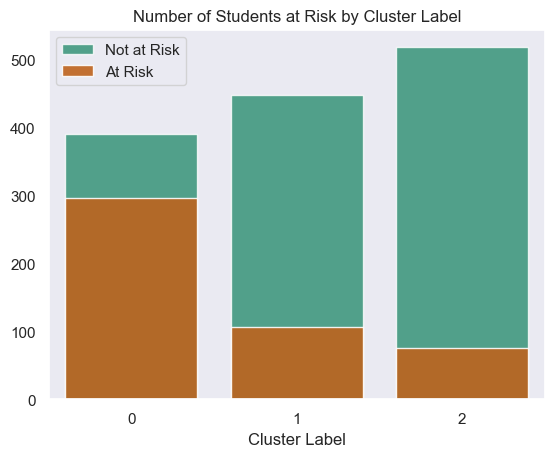

In [26]:
clabels = [0, 1, 2]
n_at_risk = []
not_at_risk = []
for i in clabels:
    n_at_risk.append(clusters.loc[clusters["cluster_label"]==i]["at_risk"].sum())
    not_at_risk.append(len(clusters.loc[clusters["cluster_label"]==i])-clusters.loc[clusters["cluster_label"]==i]["at_risk"].sum())
sns.barplot(x=clabels, y=not_at_risk, alpha=0.8, label="Not at Risk")
sns.barplot(x=clabels, y=n_at_risk, alpha=0.9, label="At Risk")
plt.legend()
plt.title("Number of Students at Risk by Cluster Label")
plt.xlabel("Cluster Label")
plt.show()

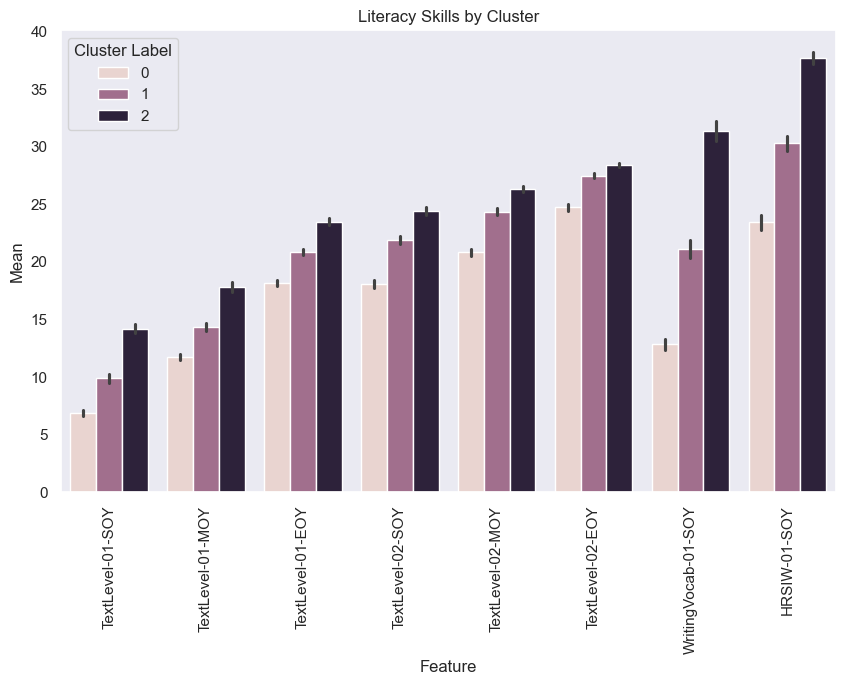

In [ ]:
df_melted = clusters.melt(id_vars=["cluster_label"], value_vars=clusters.columns[:8], var_name="Feature", value_name="Mean")


plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_melted)

plt.xticks(rotation=90)
plt.title("Literacy Skills by Cluster")
plt.legend(title="Cluster Label")
plt.show()


In [40]:
df_melted = clusters.melt(id_vars=["cluster_label"], value_vars=clusters.columns[8:16], var_name="Feature", value_name="Mean")
print(df_melted)

       cluster_label                         Feature  Mean
0                  1                     Counting-01     2
1                  1                     Counting-01     2
2                  2                     Counting-01     2
3                  2                     Counting-01     2
4                  2                     Counting-01     2
...              ...                             ...   ...
14659              0  Multiplication and Division-02     2
14660              1  Multiplication and Division-02     2
14661              2  Multiplication and Division-02     2
14662              2  Multiplication and Division-02     2
14663              0  Multiplication and Division-02     4

[14664 rows x 3 columns]


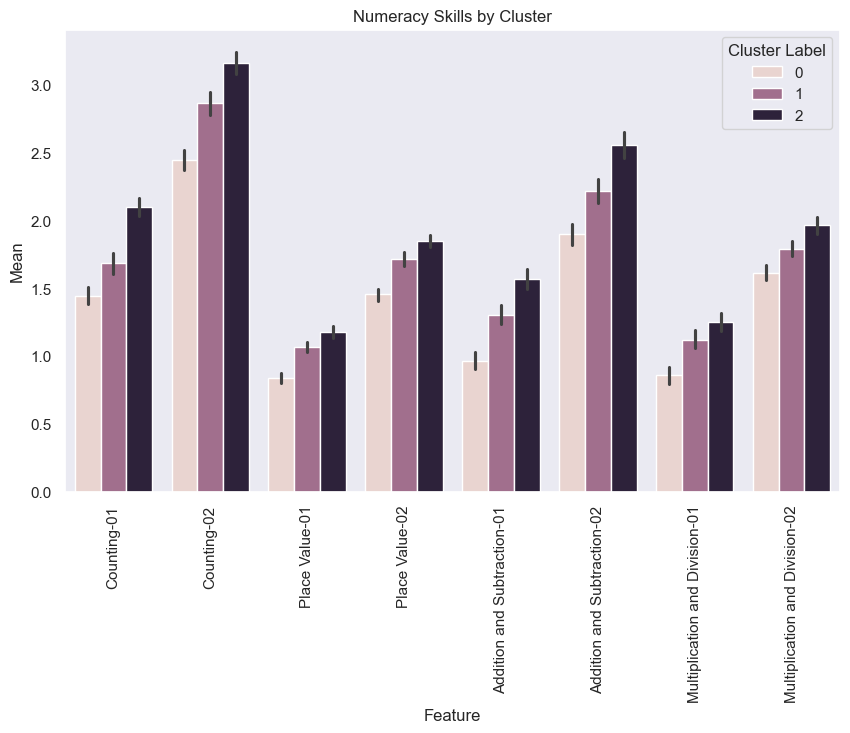

In [28]:
df_melted = clusters.melt(id_vars=["cluster_label"], value_vars=clusters.columns[8:16], var_name="Feature", value_name="Mean")

plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_melted)

plt.xticks(rotation=90)
plt.title("Numeracy Skills by Cluster")
plt.legend(title="Cluster Label")
plt.show()


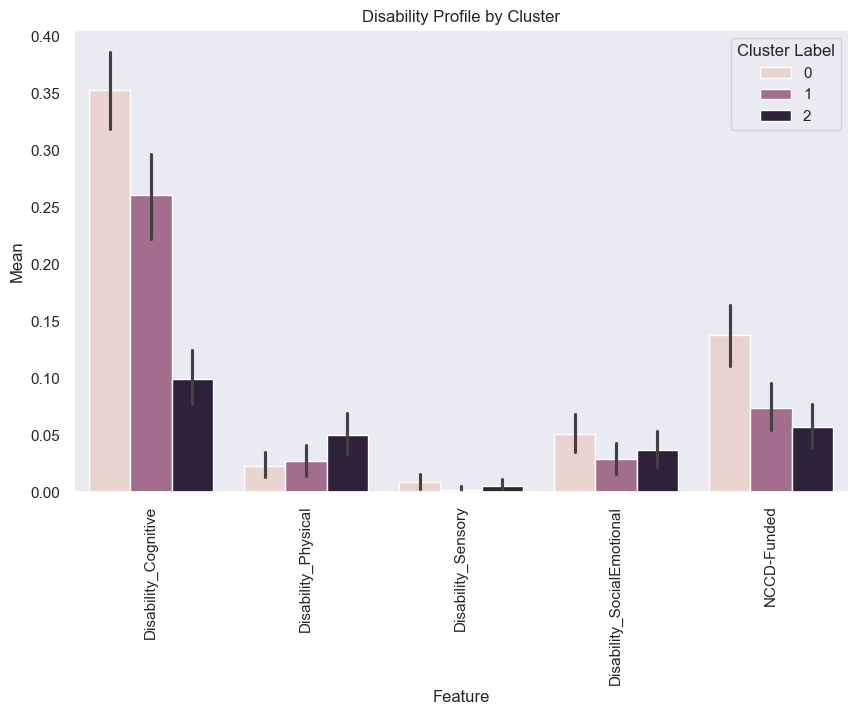

In [29]:
df_melted = clusters.melt(id_vars=["cluster_label"], value_vars=clusters.columns[19:24], var_name="Feature", value_name="Mean")

plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_melted)

plt.xticks(rotation=90)
plt.title("Disability Profile by Cluster")
plt.legend(title="Cluster Label")
plt.show()

In [128]:
disa_cols = clusters.columns[19:23]
newclust = clusters
for i in disa_cols:
    newclust[i[11:]+"_funded"] = [x if x==2 else 0 for x in newclust[i]+newclust["NCCD-Funded"]]

print(newclust.describe())

       TextLevel-01-SOY  TextLevel-01-MOY  TextLevel-01-EOY  TextLevel-02-SOY  \
count       1833.000000       1833.000000       1833.000000       1833.000000   
mean          10.168031         14.487179         20.708674         21.299509   
std            5.530002          4.943234          4.225006          4.848725   
min            0.000000          0.000000          4.000000          2.000000   
25%            6.000000         11.000000         18.000000         18.000000   
50%           10.000000         14.000000         20.000000         21.000000   
75%           13.000000         17.000000         23.000000         25.000000   
max           31.000000         31.000000         31.000000         31.000000   

       TextLevel-02-MOY  TextLevel-02-EOY  WritingVocab-01-SOY  HRSIW-01-SOY  \
count       1833.000000       1833.000000          1833.000000   1833.000000   
mean          23.696127         26.759956            21.333879     30.120567   
std            4.471998       

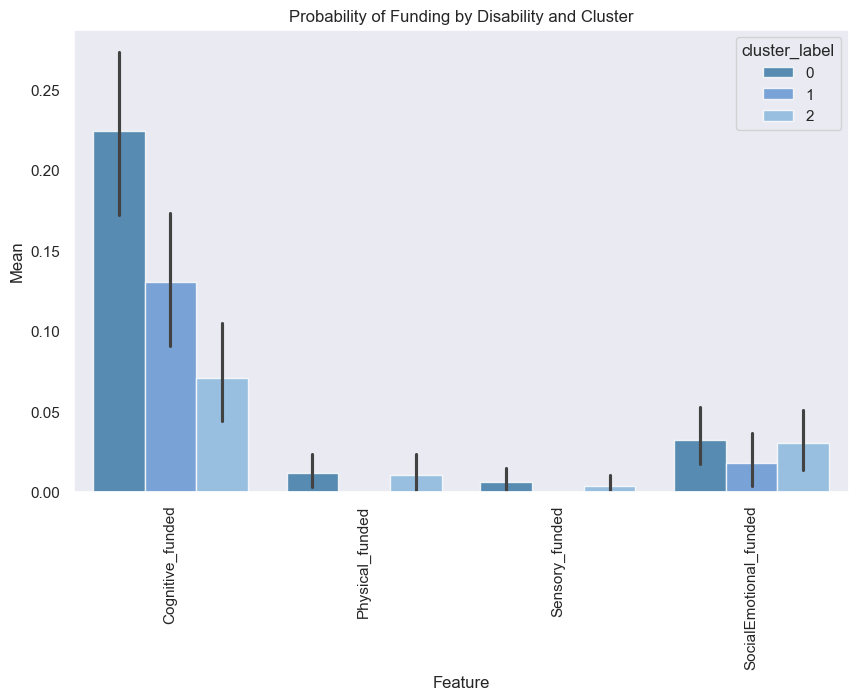

In [131]:
df_funded = newclust.melt(
        id_vars=["cluster_label"], 
        value_vars=clusters.columns[-4:], 
        var_name="Feature", 
        value_name="Mean"
        )


plt.figure(figsize=(10, 6))

funded_palette = ["#1f77b4", "#4a90e2", "#76b7eb"]

sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_funded, alpha=0.8, palette=funded_palette)

plt.xticks(rotation=90, )
plt.title("Probability of Funding by Disability and Cluster")
handles, labels = plt.gca().get_legend_handles_labels()


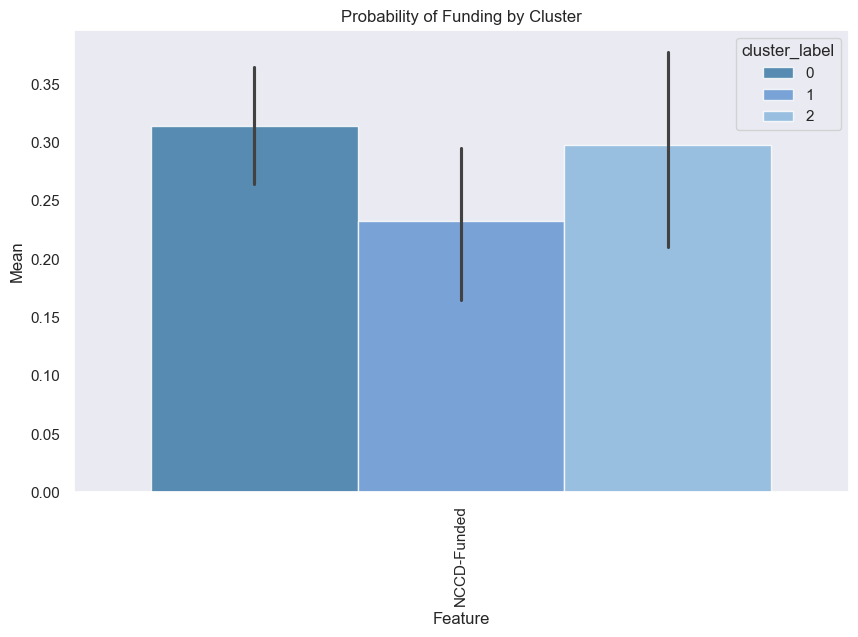

In [130]:


df_funded = clusters.loc[
    ((clusters.iloc[:, 19:23] == 1).any(axis=1))
    ].melt(
        id_vars=["cluster_label"], 
        value_vars=clusters.columns[23], 
        var_name="Feature", 
        value_name="Mean"
        )


plt.figure(figsize=(10, 6))

funded_palette = ["#1f77b4", "#4a90e2", "#76b7eb"]

sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_funded, alpha=0.8, palette=funded_palette)

plt.xticks(rotation=90)
plt.title("Probability of Funding by Cluster")
handles, labels = plt.gca().get_legend_handles_labels()

plt.show()

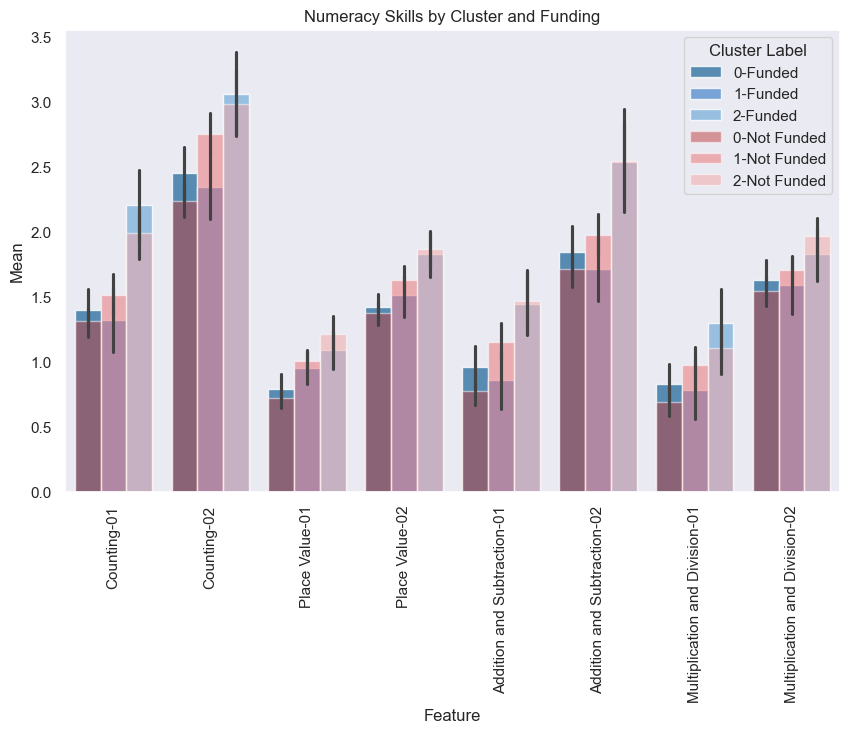

In [92]:
df_funded = clusters.loc[
    (clusters["NCCD-Funded"]==1)&((clusters.iloc[:, 19:23] == 1).any(axis=1))
    ].melt(
        id_vars=["cluster_label"], 
        value_vars=clusters.columns[8:16], 
        var_name="Feature", 
        value_name="Mean"
        )
df_not = clusters.loc[
    (clusters["NCCD-Funded"]==0)&((clusters.iloc[:, 19:23] == 1).any(axis=1))
    ].melt(
        id_vars=["cluster_label"], 
        value_vars=clusters.columns[8:16], 
        var_name="Feature", 
        value_name="Mean"
        )

plt.figure(figsize=(10, 6))

funded_palette = ["#1f77b4", "#4a90e2", "#76b7eb"]
not_funded_palette = ["#d62728", "#ff5a5f", "#ff9896"]

sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_funded, alpha=0.8, palette=funded_palette)
sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_not, alpha=0.5, palette=not_funded_palette)

plt.xticks(rotation=90)
plt.title("Numeracy Skills by Cluster and Funding")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["0-Funded", "1-Funded", "2-Funded",
                     "0-Not Funded", "1-Not Funded", "2-Not Funded"], 
           title="Cluster Label")

plt.show()

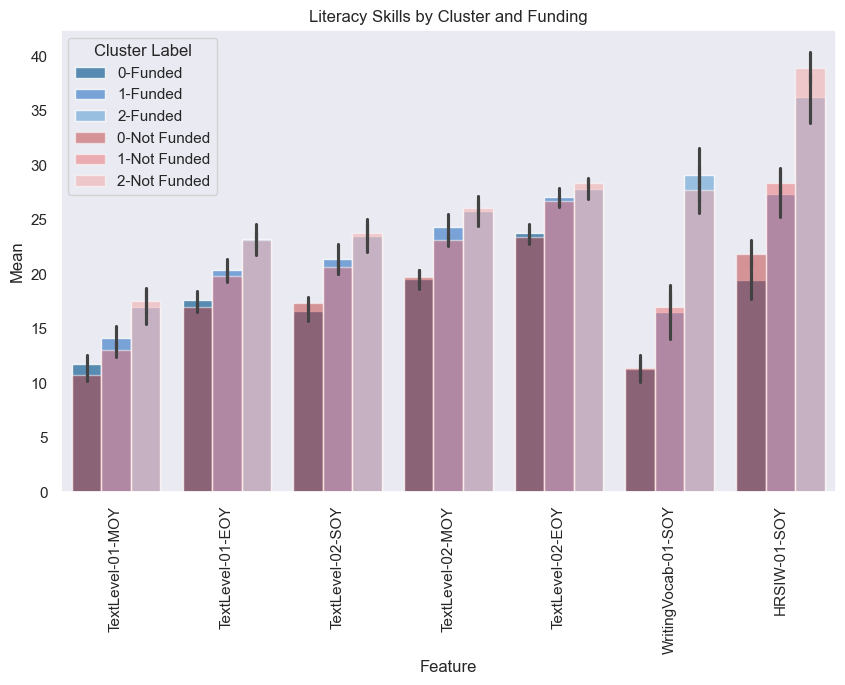

In [94]:
df_funded = clusters.loc[
    (clusters["NCCD-Funded"]==1)&((clusters.iloc[:, 19:23] == 1).any(axis=1))
    ].melt(
        id_vars=["cluster_label"], 
        value_vars=clusters.columns[1:8], 
        var_name="Feature", 
        value_name="Mean"
        )
df_not = clusters.loc[
    (clusters["NCCD-Funded"]==0)&((clusters.iloc[:, 19:23] == 1).any(axis=1))
    ].melt(
        id_vars=["cluster_label"], 
        value_vars=clusters.columns[1:8], 
        var_name="Feature", 
        value_name="Mean"
        )

plt.figure(figsize=(10, 6))

funded_palette = ["#1f77b4", "#4a90e2", "#76b7eb"]
not_funded_palette = ["#d62728", "#ff5a5f", "#ff9896"]

sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_funded, alpha=0.8, palette=funded_palette)
sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_not, alpha=0.5, palette=not_funded_palette)

plt.xticks(rotation=90)
plt.title("Literacy Skills by Cluster and Funding")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["0-Funded", "1-Funded", "2-Funded",
                     "0-Not Funded", "1-Not Funded", "2-Not Funded"], 
           title="Cluster Label")

plt.show()

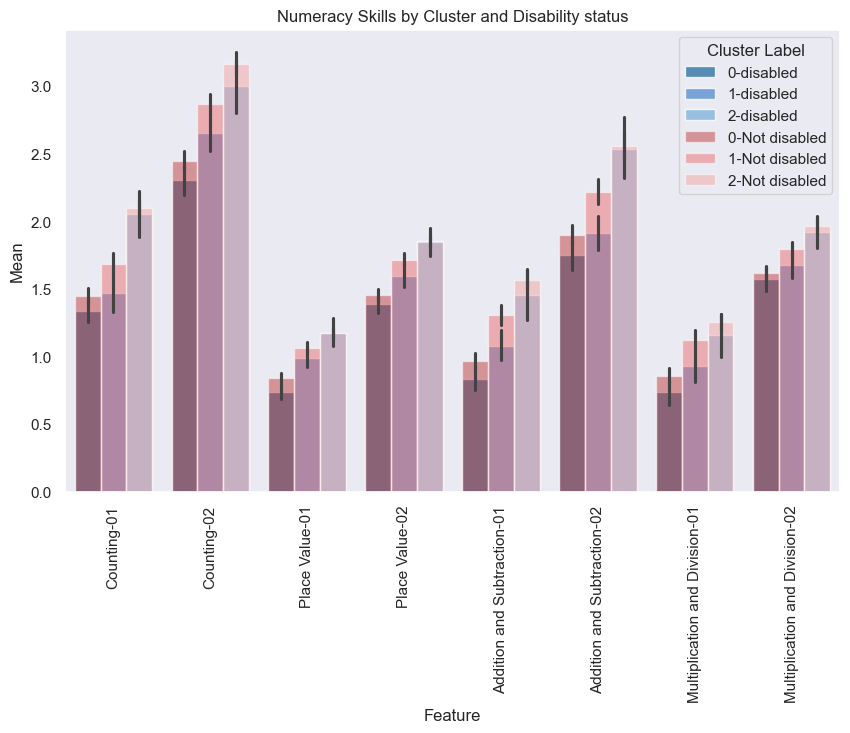

In [98]:
df_disabled = clusters.loc[
    ((clusters.iloc[:, 19:23] == 1).any(axis=1))
    ].melt(
        id_vars=["cluster_label"], 
        value_vars=clusters.columns[8:16], 
        var_name="Feature", 
        value_name="Mean"
        )
df_not = clusters.loc[
    ((clusters.iloc[:, 19:23] == 0).any(axis=1))
    ].melt(
        id_vars=["cluster_label"], 
        value_vars=clusters.columns[8:16], 
        var_name="Feature", 
        value_name="Mean"
        )

plt.figure(figsize=(10, 6))

disabled_palette = ["#1f77b4", "#4a90e2", "#76b7eb"]
not_disabled_palette = ["#d62728", "#ff5a5f", "#ff9896"]

sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_disabled, alpha=0.8, palette=disabled_palette)
sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_not, alpha=0.5, palette=not_disabled_palette)

plt.xticks(rotation=90)
plt.title("Numeracy Skills by Cluster and Disability status")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["0-disabled", "1-disabled", "2-disabled",
                     "0-Not disabled", "1-Not disabled", "2-Not disabled"], 
           title="Cluster Label")

plt.show()

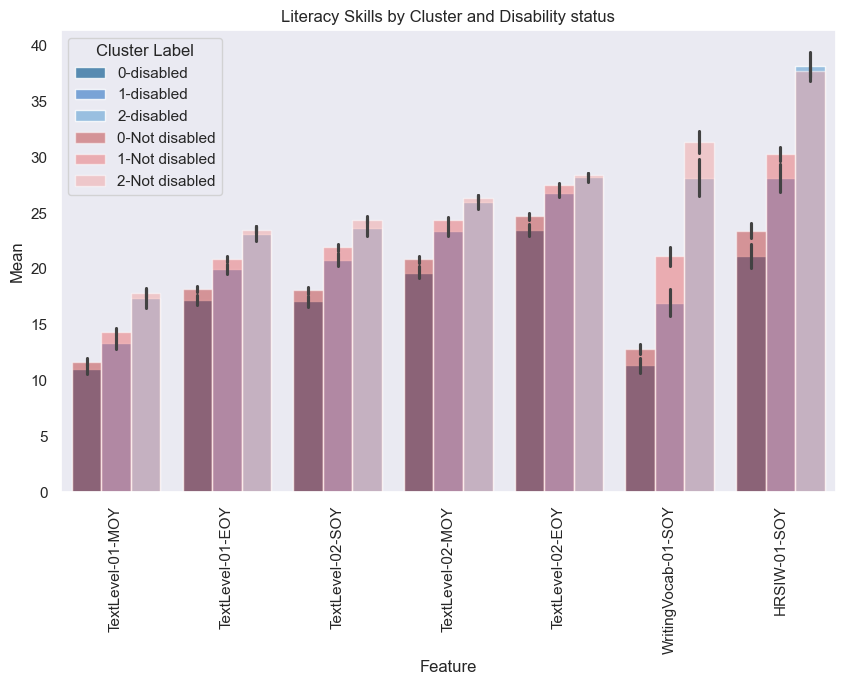

In [97]:
df_disabled = clusters.loc[
    ((clusters.iloc[:, 19:23] == 1).any(axis=1))
    ].melt(
        id_vars=["cluster_label"], 
        value_vars=clusters.columns[1:8], 
        var_name="Feature", 
        value_name="Mean"
        )
df_not = clusters.loc[
    ((clusters.iloc[:, 19:23] == 0).any(axis=1))
    ].melt(
        id_vars=["cluster_label"], 
        value_vars=clusters.columns[1:8], 
        var_name="Feature", 
        value_name="Mean"
        )

plt.figure(figsize=(10, 6))

disabled_palette = ["#1f77b4", "#4a90e2", "#76b7eb"]
not_disabled_palette = ["#d62728", "#ff5a5f", "#ff9896"]

sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_disabled, alpha=0.8, palette=disabled_palette)
sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_not, alpha=0.5, palette=not_disabled_palette)

plt.xticks(rotation=90)
plt.title("Literacy Skills by Cluster and Disability status")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["0-disabled", "1-disabled", "2-disabled",
                     "0-Not disabled", "1-Not disabled", "2-Not disabled"], 
           title="Cluster Label")

plt.show()

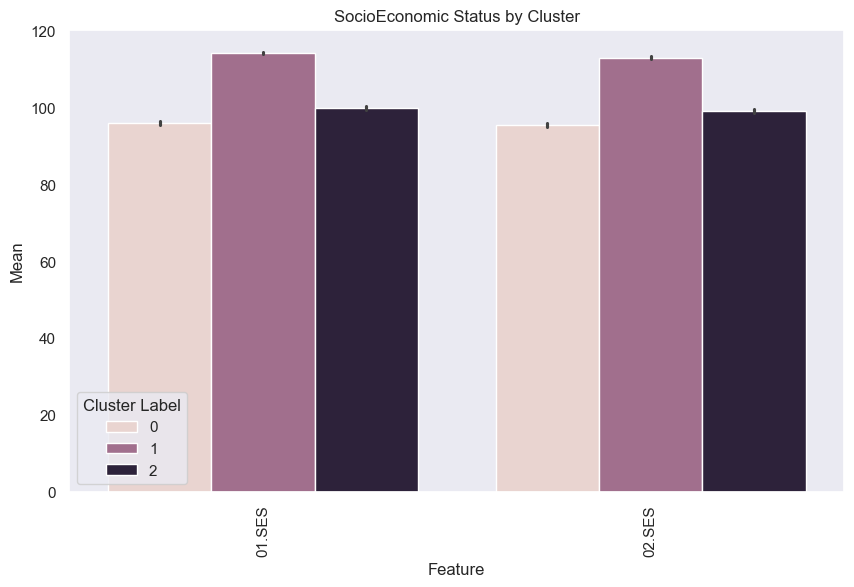

In [30]:
df_melted = clusters.melt(id_vars=["cluster_label"], value_vars=clusters.columns[26:28], var_name="Feature", value_name="Mean")

plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Mean", hue="cluster_label", data=df_melted)

plt.xticks(rotation=90)
plt.title("SocioEconomic Status by Cluster")
plt.legend(title="Cluster Label")
plt.show()